# **[Data4life] Trending YouTube Analysis**

## **Import packages**

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

pd.options.display.float_format = '{:,.2f}'.format

## **Load datasets**

In [2]:
us_videos = pd.read_csv(filepath_or_buffer='./data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
with open(file='./data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Clean data**

In [4]:
# Check the concise summary of the dataset
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

- Column `description` has missing values.
- Columns `trending_date` and `publish_time` should be converted to **datetime** type.

In [5]:
# Check the descriptive statistics of the dataset
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


Some videos receive a **significantly higher** number of views, likes, dislikes, or comments compared to **the majority** of other videos.

In [6]:
print(f'The number of duplicate rows: {us_videos.duplicated().sum()}')

The number of duplicate rows: 48


In [7]:
# Drop duplicate rows
us_videos.drop_duplicates(inplace=True, ignore_index=True)
print(f'The number of duplicate rows after cleaning: {us_videos.duplicated().sum()}')

The number of duplicate rows after cleaning: 0


In [8]:
print(f'The number of duplicate daily records for a video: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video: 2


In [9]:
# Drop duplicate daily records for a video
us_videos.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True, ignore_index=True)
print(f'The number of duplicate daily records for a video after cleaning: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video after cleaning: 0


In [10]:
# Convert column "trending_date" and "publish_time" to datetime type
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [11]:
# Check the final type of each column
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [12]:
# Create new column "category" based on the "category_id" column
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [13]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


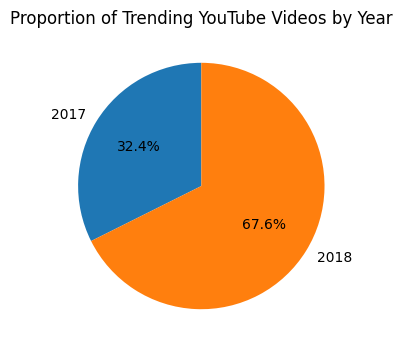

In [14]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in 2017 was significantly less than in 2018. Now, let's check the start and last dates in this dataset.

In [15]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In 2017, there are just 2 months (November to December), while in 2018, there are 6 months (January to June). Thus, the difference in quantity is normal.

### **Question 2: How many videos have disabled comments?**

In [16]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

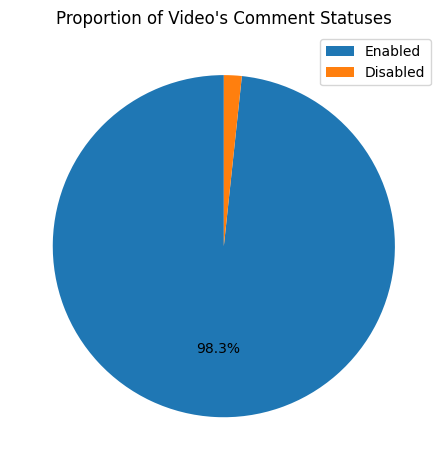

In [17]:
def autopct_func_90(pct):
    return f'{pct:.1f}%' if pct > 90 else ''

us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Comment Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

Most videos have comments enabled.

### **Question 3: How many videos have disabled ratings?**

In [18]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique()

ratings_disabled
False    6327
True       32
Name: video_id, dtype: int64

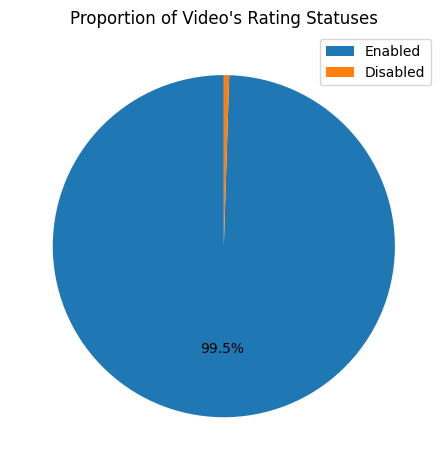

In [19]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Rating Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

Most videos have rating enabled.

### **Question 4: How many videos have errors or have been removed?**

In [20]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique()

video_error_or_removed
False    6348
True        4
Name: video_id, dtype: int64

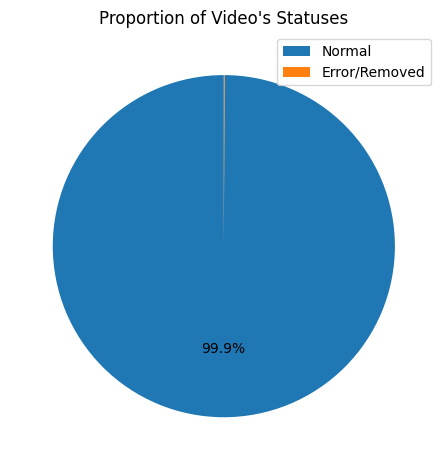

In [21]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Statuses")
plt.ylabel(ylabel='')
plt.legend(['Normal', 'Error/Removed'])
plt.tight_layout()
plt.show()

Only a small number of videos are removed or have errors.

## **Videos**

### **Question 5: How long does it take for videos to start trending?**

In [22]:
trending_time = us_videos.groupby(by='video_id', as_index=False).agg(func={'publish_time': 'first', 'trending_date': 'min'})
trending_time['days_to_trending'] = (trending_time['trending_date'] - trending_time['publish_time']).dt.days + 1

In [23]:
trending_time_bins = ['<= 1 day', '2 days', '3 days', '4 days', '5 days', '6 days', '>= 7 days']
trending_time['days_to_trending_bins'] = pd.cut(x=trending_time['days_to_trending'], bins=[-np.inf, 1, 2, 3, 4, 5, 6, np.inf], labels=trending_time_bins)

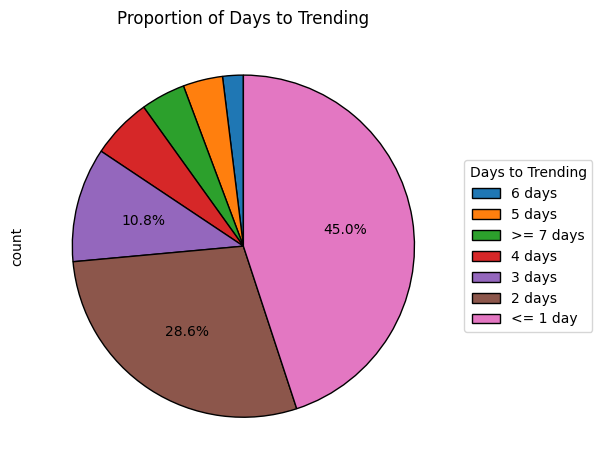

In [24]:
def autopct_func(pct):
    return '{:.1f}%'.format(pct) if pct > 10 else ''
trending_time['days_to_trending_bins'].value_counts().sort_values(ascending=True).plot.pie(labels=None, startangle=90,  autopct=lambda pct: autopct_func(pct), wedgeprops={'edgecolor': 'black'})
plt.legend(
    trending_time['days_to_trending_bins'].value_counts().sort_values(ascending=True).index,
    title="Days to Trending",
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.title(label='Proportion of Days to Trending')
plt.tight_layout()
plt.show()

- **Conclusion**
    - **Shorter Trending Times**: The larger proportion of data falling into `<= 1 day` and `2 days` indicates that most videos trend very quickly, possibly showing fast-moving trends.

    - **Longer Trending Times**: Categories like `>= 7 days` and `6 days` might represent more long-term trends or niche topics that are less common but still noteworthy.

### **Question 6: Identify which categories influence the time it takes for a video to start trending after being published?**

In [25]:
trending_time = trending_time.merge(right=us_videos[['video_id', 'category']], how='inner', on='video_id').drop_duplicates(subset='video_id', ignore_index=True)

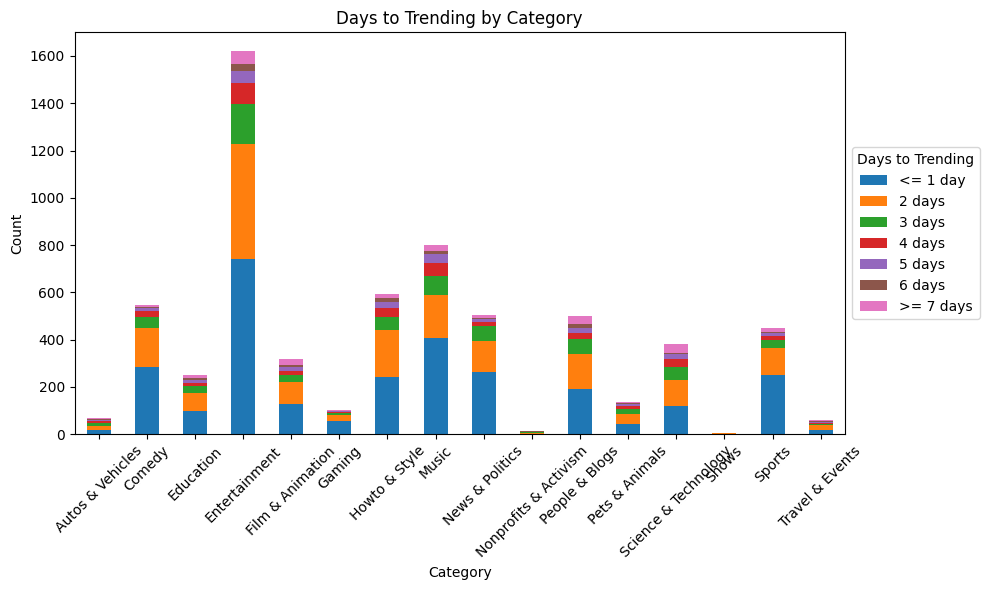

In [26]:
trending_time.groupby(by='category')['days_to_trending_bins'].value_counts().unstack().plot.bar(stacked=True, figsize=(10, 6))
plt.title(label='Days to Trending by Category')
plt.xlabel(xlabel='Category')
plt.ylabel(ylabel='Count')
plt.xticks(rotation=45)
plt.legend(title='Days to Trending', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

- **Conclusion**: there is no definitive evidence to suggest which categories consistently lead to a video trending after a certain period following publication.

### **Question 7: What is the duration for which videos stay on the YouTube Trending Board?**

In [27]:
trending_duration = us_videos.groupby(by='video_id')['trending_date'].count().sort_values(ascending=False).rename('trending_duration').reset_index()

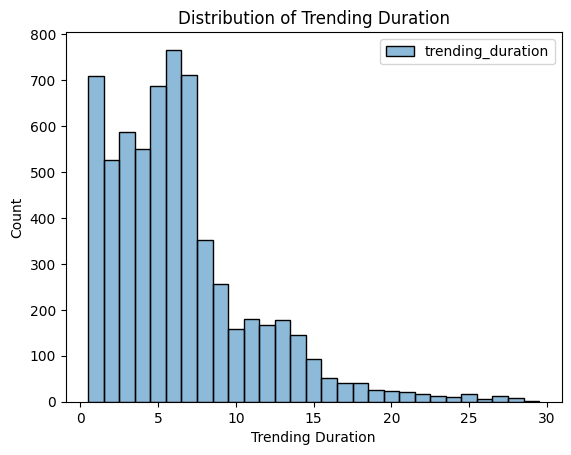

In [28]:
sns.histplot(data=trending_duration, discrete=True)
plt.title(label='Distribution of Trending Duration')
plt.xlabel(xlabel='Trending Duration')
plt.show()

Most videos remain on the YouTube Trending Board for under 10 days.

## **Channels**

### **Question 8: What is the number of channels?**

In [29]:
print(f'The number of channels: {us_videos['channel_title'].nunique()}')

The number of channels: 2207


### **Question 9: Which channels feature the highest number of trending videos?**

In [30]:
videos_by_channel = us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False)

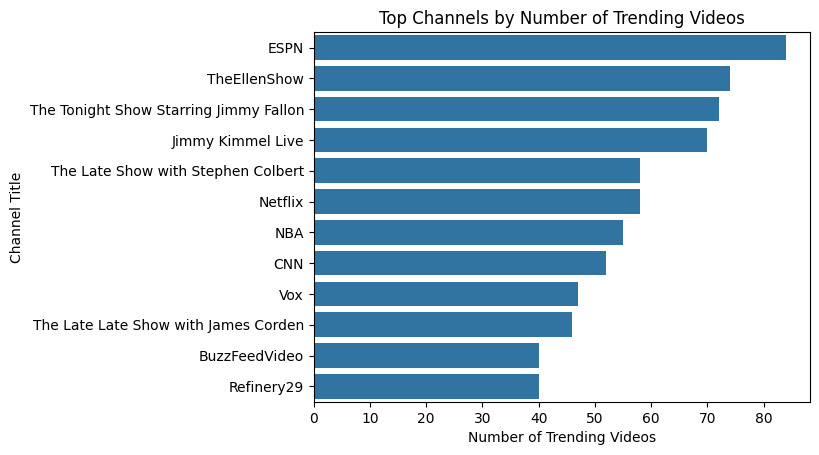

In [31]:
sns.barplot(data=videos_by_channel[videos_by_channel >= 40], orient='h')
plt.title(label='Top Channels by Number of Trending Videos')
plt.xlabel(xlabel='Number of Trending Videos')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 10: Which channels have the highest number of published categories?**

In [32]:
categories_by_channel = us_videos.groupby(by='channel_title', as_index=False)['category'].nunique().sort_values(by='category', ascending=False)
categories_by_channel.head()

,channel_title,category
807,INSIDER,7
1935,ViralHog,7
1265,National Geographic,6
1713,Teen Vogue,5
1950,WIRED,5


In [33]:
categories_by_channel['category_segment'] = np.where(
    categories_by_channel['category'] == 1, '1', '2 -> 7'
)

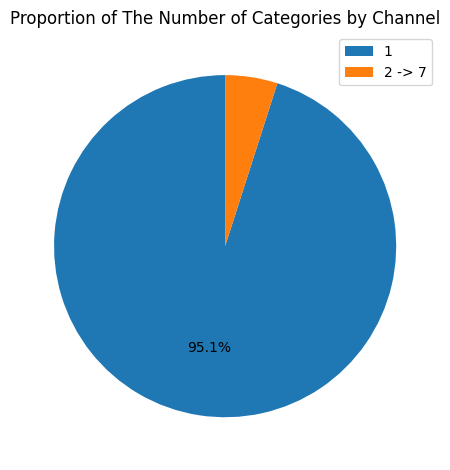

In [34]:
categories_by_channel['category_segment'].value_counts().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label='Proportion of The Number of Categories by Channel')
plt.ylabel(ylabel='')
plt.legend(['1', '2 -> 7'])
plt.tight_layout()
plt.show()

Only a few channels are capable of making trending videos across different categories.

### **Question 11: Which channels receive the most average views, likes, dislikes, and comments?**

In [35]:
latest_trending_date = us_videos.groupby(by='video_id', as_index=False)['trending_date'].max()
latest_trending_date = latest_trending_date.merge(right=us_videos, on=['video_id', 'trending_date'])

#### **Views**

In [36]:
views_by_channel = latest_trending_date.groupby(by='channel_title')['views'].mean().sort_values(ascending=False).head(n=10)

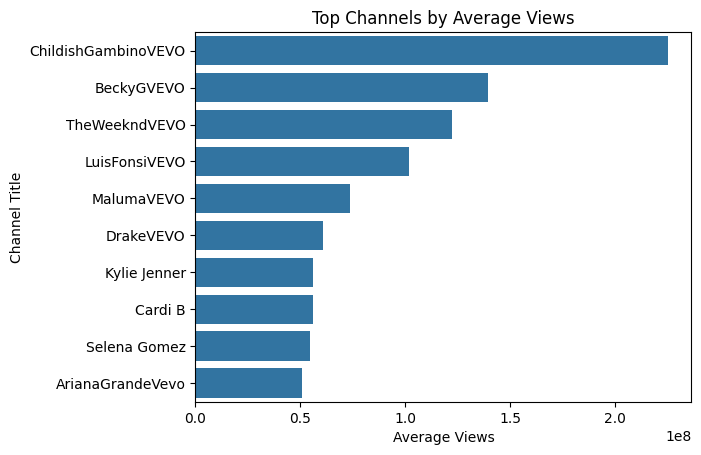

In [37]:
sns.barplot(data=views_by_channel, orient='h')
plt.title(label='Top Channels by Average Views')
plt.xlabel(xlabel='Average Views')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Likes**

In [38]:
likes_by_channel = latest_trending_date.groupby(by='channel_title')['likes'].mean().sort_values(ascending=False).head(n=10)

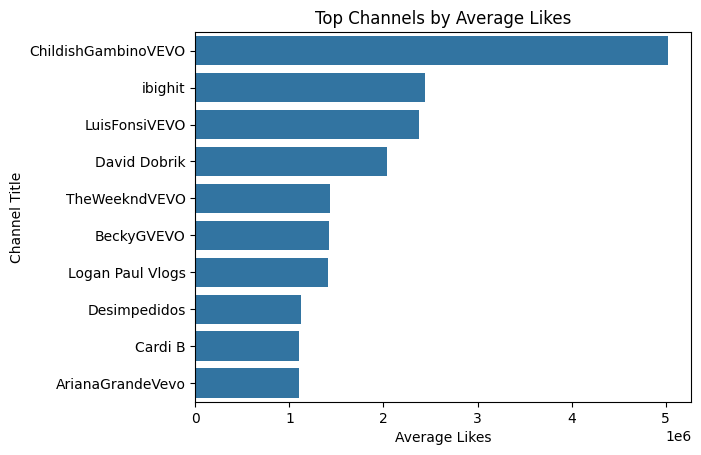

In [39]:
sns.barplot(data=likes_by_channel, orient='h')
plt.title(label='Top Channels by Average Likes')
plt.xlabel(xlabel='Average Likes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Dislikes**

In [40]:
dislikes_by_channel = latest_trending_date.groupby(by='channel_title')['dislikes'].mean().sort_values(ascending=False).head(n=10)

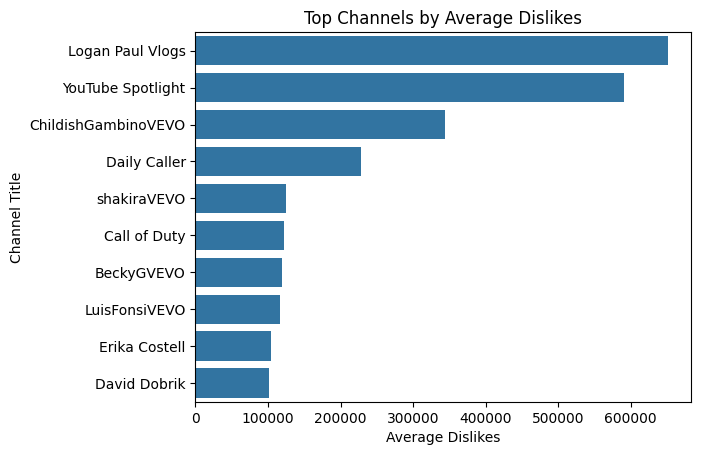

In [41]:
sns.barplot(data=dislikes_by_channel, orient='h')
plt.title(label='Top Channels by Average Dislikes')
plt.xlabel(xlabel='Average Dislikes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Comments**

In [42]:
comments_by_channel = latest_trending_date.groupby(by='channel_title')['comment_count'].mean().sort_values(ascending=False).head(n=10)

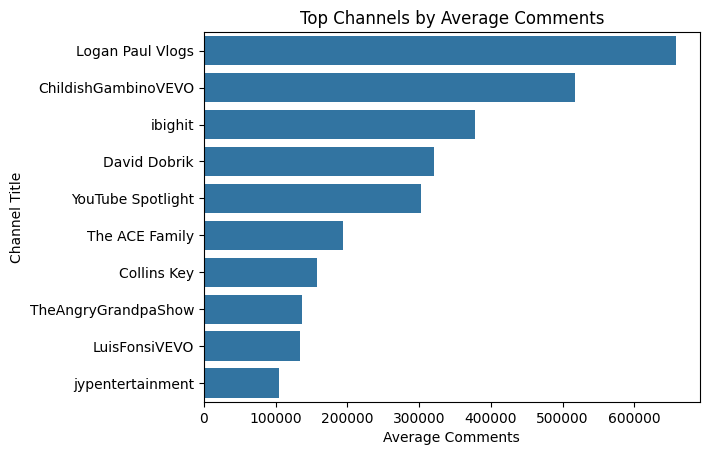

In [43]:
sns.barplot(data=comments_by_channel, orient='h')
plt.title(label='Top Channels by Average Comments')
plt.xlabel(xlabel='Average Comments')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 12: Which channels have the best average ratio of likes to dislikes?**

In [44]:
likes_to_dislikes = latest_trending_date.copy()
likes_to_dislikes['likes_to_dislikes'] = likes_to_dislikes['likes'] / (likes_to_dislikes['dislikes'] + 1) # Avoid division by zero
likes_to_dislikes = likes_to_dislikes.groupby(by='channel_title')['likes_to_dislikes'].mean().sort_values(ascending=False).head(n=10)

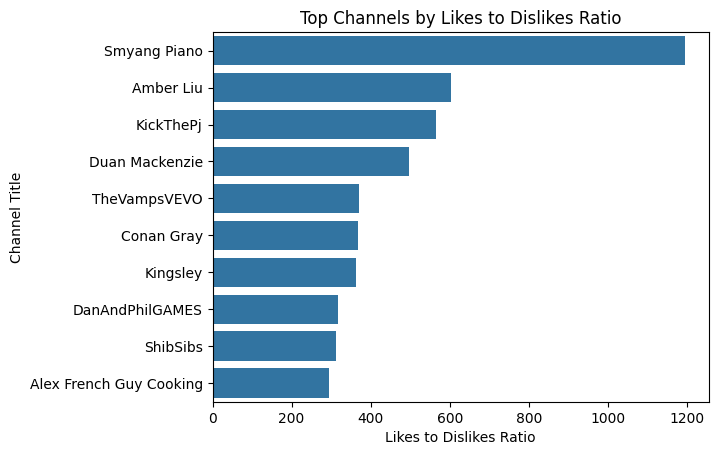

In [45]:
sns.barplot(data=likes_to_dislikes, orient='h')
plt.title(label='Top Channels by Likes to Dislikes Ratio')
plt.xlabel(xlabel='Likes to Dislikes Ratio')
plt.ylabel(ylabel='Channel Title')
plt.show()

## **Seasonality**

### **Question 13: Which months or quarters see the highest number of published videos?**

In [46]:
videos_by_publish_month = us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()

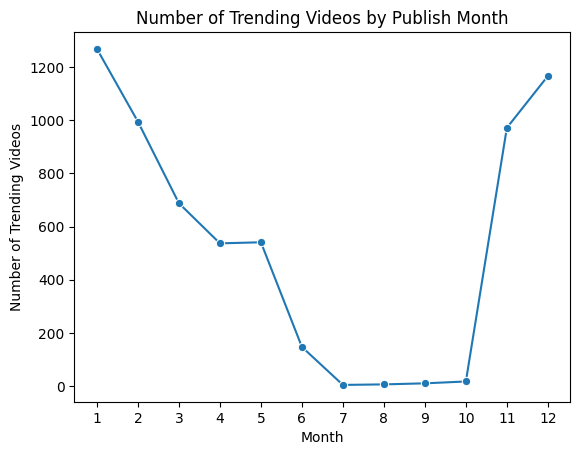

In [47]:
sns.lineplot(data=videos_by_publish_month, marker='o')
plt.title(label='Number of Trending Videos by Publish Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [48]:
videos_by_publish_quarter = us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique()

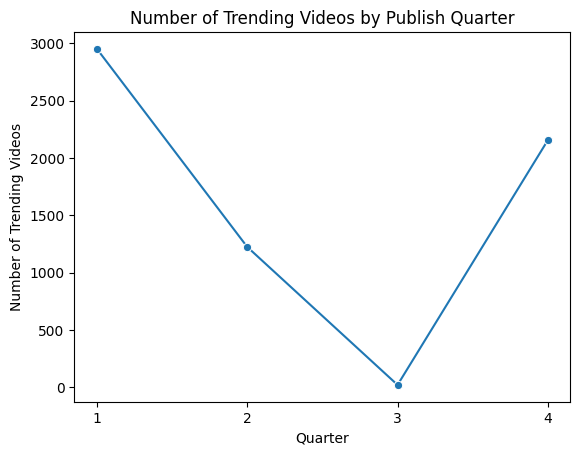

In [49]:
sns.lineplot(data=videos_by_publish_quarter, marker='o')
plt.title(label='Number of Trending Videos by Publish Quarter')
plt.xlabel(xlabel='Quarter')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

### **Question 14: Which months see the highest number of trending videos?**

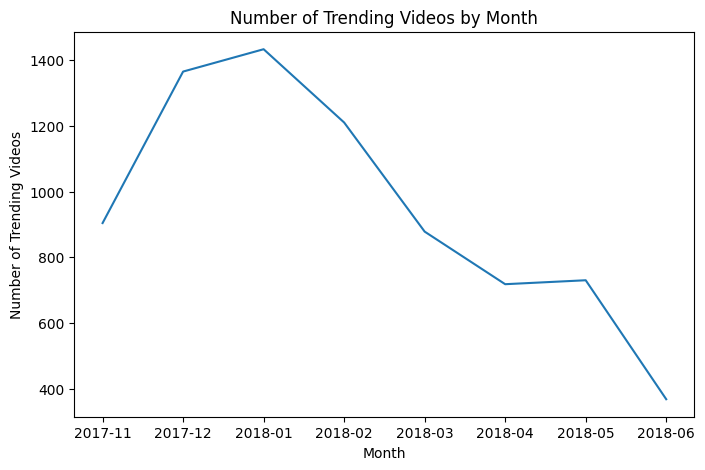

In [50]:
trending_by_time = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_time['trending_month'] = trending_by_time['trending_date'].astype(str).str[:7]
trending_by_time.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=trending_by_time.groupby(by='trending_month')['video_id'].nunique())
plt.title(label='Number of Trending Videos by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

- **Conclusion**: As illustrated in the plot, the majority of trending videos were created between November and March, which also aligns with their trending start dates after publication. This suggests that during this period, audiences have more time to engage with videos. Therefore, creating content during this time may increase the likelihood of your videos trending.

## **Title**

### **Question 15: How many videos have titles that are capitalized or non-capitalized?**

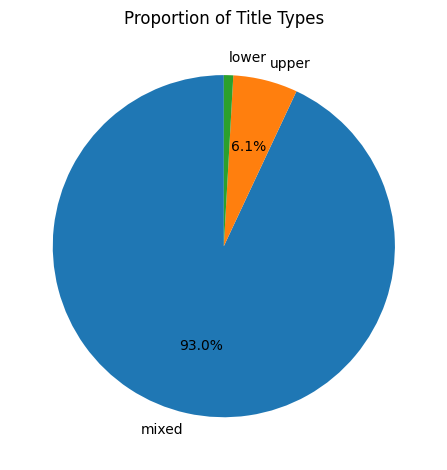

In [51]:
title_types = us_videos.loc[:, ['video_id', 'title']]
title_types['type'] = np.where(
    title_types['title'] == title_types['title'].str.upper(), 'upper', np.where(
        title_types['title'] == title_types['title'].str.lower(), 'lower', 'mixed'
    )
)

def autopct_func_1(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

title_types['type'].value_counts().plot.pie(startangle=90, autopct=autopct_func_1)
plt.title(label='Proportion of Title Types')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

### **Question 16: What is the length of videos' title?**

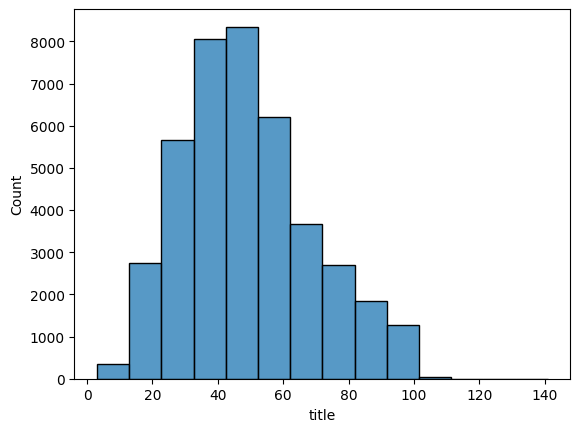

In [52]:
sns.histplot(data=us_videos['title'].str.len(), binwidth=10)
plt.show()

## **Categories**

### **Question 17: What categories are the most common?**

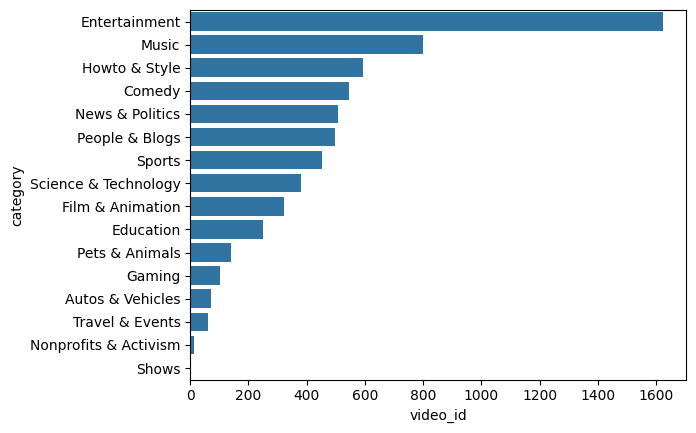

In [53]:
sns.barplot(data=us_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 18: What is the average trending duration for these categories?**

In [54]:
num_videos = us_videos.groupby('category')['video_id'].nunique().reset_index().rename(columns={'video_id': 'num_videos'})
avg_trending_date_by_category = trending_duration.merge(right=us_videos[['video_id', 'category']], on='video_id').drop_duplicates(subset='video_id').reset_index(drop=True).groupby('category')['trending_duration'].mean().reset_index().sort_values(by='trending_duration', ascending=False).reset_index(drop=True)
avg_trending_date_by_category = avg_trending_date_by_category.merge(right=num_videos, on='category')
avg_trending_date_by_category

,category,trending_duration,num_videos
0,Shows,14.25,4
1,Music,8.08,801
2,Gaming,7.92,103
3,Film & Animation,7.35,321
4,Howto & Style,6.97,595
5,Travel & Events,6.73,60
6,Education,6.61,251
7,Pets & Animals,6.56,141
8,People & Blogs,6.48,498
9,Comedy,6.34,547


- **Insights for Content Strategy**

    - **Longer Trending Duration**: Categories like `Shows`, `Music`, and `Gaming` may indicate an opportunity to focus on content that sustains viewer interest over longer periods. These categories might benefit from strategies targeting ongoing engagement and building a loyal audience.

    - **High Volume but Short Duration**: Categories like `Entertainment` and `Comedy` may indicate that viral, short-lived content can perform well, but trends tend to dissipate quickly. Content creators in these categories should focus on producing high volumes of content to maintain visibility.

    - **Smaller, Niche Categories**: Categories like `Nonprofits & Activism` and `Autos & Vehicles` may have smaller audiences, but the content can be highly targeted. Creators in these niches could consider a strategy that focuses on community engagement or specific, high-impact moments.

### **Question 19: What categories receive the most average views, likes, dislikes, and comments?**

#### **Views**

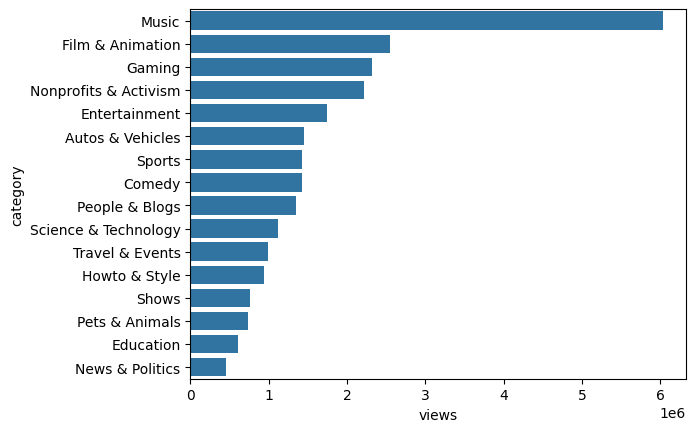

In [55]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

- **Insights and Observations**
    - **High Engagement Categories**:
        
        `Music`, `Film & Animation`, and `Gaming` stand out as categories with a strong balance of both views and fewer videos.

        `Entertainment`, `Comedy`, and `Sports` are categories with a lot of content and decent engagement.

    - **Specialized Categories with High Impact**:
        
        `Nonprofits & Activism` shows that specialized, impactful content can generate high views with fewer videos, highlighting the potential for viral campaigns or content that addresses key social issues.
        
    - **Lower Engagement**:
        
        Categories like `Shows`, `Education`, and `News & Politics` have fewer views per video. The engagement in these areas might depend on the nature of the content (e.g., niche, ongoing series, or rapidly changing topics in news) that doesn’t sustain viewer interest as long as categories like `Music` or `Gaming`.


- **Conclusion**:

    - **For High Engagement**: Focus on creating content in `Music`, `Gaming`, and `Film & Animation` to achieve both high views and effective audience engagement.

    - **For Content Volume**: `Entertainment` and `Comedy` could be good choices for consistently producing content, although individual views per video may be lower.

    - **For Niche or Impactful Content**: Categories like `Nonprofits & Activism` prove that even with fewer videos, impactful content can generate significant attention and engagement.

#### **Likes**

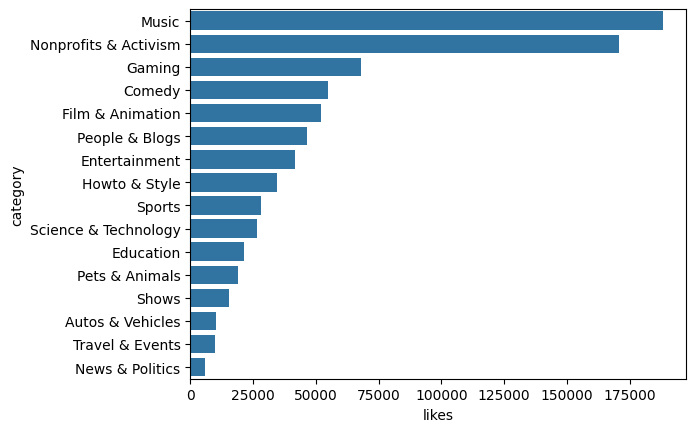

In [56]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['likes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Dislikes**

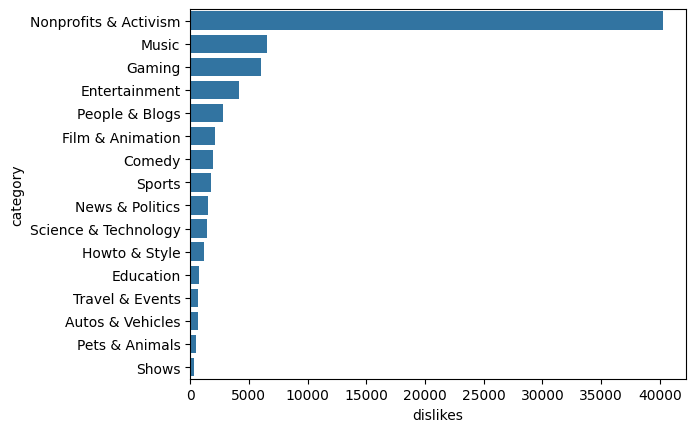

In [57]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['dislikes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Comments**

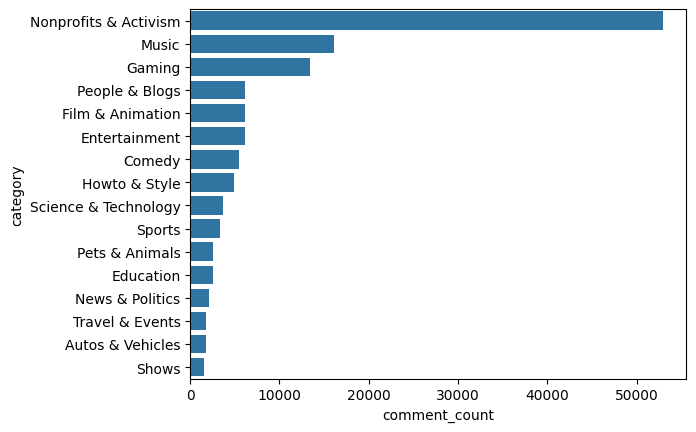

In [58]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['comment_count'].mean().sort_values(ascending=False), orient='h')
plt.show()

## **Tags**

### **Question 20: What tags are the most common?**

In [59]:
tags_dict = Counter([tag.replace('"', '') for tags in us_videos['tags'].str.split('|') for tag in tags if tag != '[none]'])
common_tags = tags_dict.most_common(10)

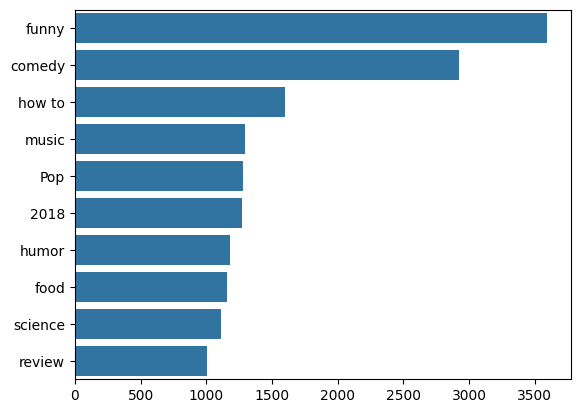

In [60]:
sns.barplot(x=[tag[1] for tag in common_tags], y=[tag[0] for tag in common_tags], orient='h')
plt.show()

## **Conclusion**

After conducting thorough analysis and addressing various questions to uncover insights from the data, our team will summarize the key takeaways you should consider if you want your video to appear in the `Trending YouTube Videos` dataset.

First, we will highlight the categories most suitable for high viewership. To achieve this, focus on the `Entertainment` and `Music` categories. These categories not only tend to attract higher views but also show longer durations of trending. After selecting the appropriate category, it is crucial to determine the optimal time to publish your video. To maximize audience reach, we recommend publishing between November and March.

Second, you want to make sure that your video will be trending regardless of how much view it has, `News and Politics` is a good option, because this category often experiences rapid spikes in viewership due to the nature of breaking news, political events, and ongoing discussions. Even with relatively lower total views compared to other categories, News and Politics content tends to trend quickly due to its timeliness and relevance.

Third, many tags include ``funny` and `comedy`. Therefore, if possible, you should incorporate comedic elements into your video to increase its chances of trending.